## Package Installation

In [1]:
!pip3 install amp-atomistics
!pip install ase

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 2.0MB 8.4MB/s 
  Created wheel for amp-atomistics: filename=amp_atomistics-0.6.1-cp36-cp36m-linux_x86_64.whl size=396393 sha256=21bddc96fd0c2422f057c004258882a60581f1ff0659e3a8cbd856fd8d381a89
  Stored in directory: /root/.cache/pip/wheels/47/d6/45/58abd238ea8c11658b0a5ab89b2921baee491e049a7c204b21
Successfully built amp-atomistics


## Import necessary packages and functions

In [0]:
from __future__ import print_function

from ase.cluster.cubic import FaceCenteredCubic
from ase.optimize import QuasiNewton
from ase.md.velocitydistribution import (MaxwellBoltzmannDistribution,
                                         Stationary, ZeroRotation)
from ase.md.verlet import VelocityVerlet
from ase import units
from ase.build import molecule
from ase.calculators.nwchem import NWChem
from ase.calculators.emt import EMT

from ase.io import read
from amp import Amp

### EMT MD calculation

In [3]:
# Set up a atom project
atoms = molecule('H2O')
print(atoms.get_positions())
# Describe the interatomic interactions with the Effective Medium Theory
# atoms.set_calculator(EMT())
# calc = NWChem(label='calc/nwchem', maxiter=2000, xc='B3LYP', basis='6-31+G**')
atoms.set_calculator(EMT())
# Do a quick relaxation of the cluster
qn = QuasiNewton(atoms)
qn.run(0.001, 10)

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, 300* units.kB)
Stationary(atoms)  # zero linear momentum
ZeroRotation(atoms)  # zero angular momentum

# We want to run MD using the VelocityVerlet algorithm.
# Save trajectory:
%rm -rf emt.traj
dyn = VelocityVerlet(atoms, 1.5 * units.fs, trajectory='emt.traj')

def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))

dyn.attach(printenergy, interval=10)

# Now run the dynamics
printenergy()
dyn.run(100)

[[ 0.        0.        0.119262]
 [ 0.        0.763239 -0.477047]
 [ 0.       -0.763239 -0.477047]]
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:54:11        2.619811*       7.7384
BFGSLineSearch:    1[  2] 23:54:11        1.879326*       0.0443
BFGSLineSearch:    2[  4] 23:54:11        1.879251*       0.0273
BFGSLineSearch:    3[  7] 23:54:11        1.878910*       0.0344
BFGSLineSearch:    4[  8] 23:54:11        1.878887*       0.0070
BFGSLineSearch:    5[  9] 23:54:11        1.878884*       0.0003
Energy per atom: Epot = 0.626eV  Ekin = 0.054eV (T=420K)  Etot = 0.681eV
Energy per atom: Epot = 0.626eV  Ekin = 0.054eV (T=420K)  Etot = 0.681eV
Energy per atom: Epot = 0.653eV  Ekin = 0.034eV (T=263K)  Etot = 0.687eV
Energy per atom: Epot = 0.662eV  Ekin = 0.025eV (T=190K)  Etot = 0.686eV
Energy per atom: Epot = 0.687eV  Ekin = 0.004eV (T= 31K)  Etot = 0.691eV
Energy per atom: Epot = 0.691eV

True

### AMP MD Calculation

In [5]:
from google.colab import files
files.upload()

Saving amp.amp to amp.amp


{'amp.amp': b'dict(descriptor="dict(Gs={\'H\': [{\'type\': \'G2\', \'element\': \'H\', \'eta\': 0.049999999999999996}, {\'type\': \'G2\', \'element\': \'O\', \'eta\': 0.049999999999999996}, {\'type\': \'G2\', \'element\': \'H\', \'eta\': 0.2320794416806389}, {\'type\': \'G2\', \'element\': \'O\', \'eta\': 0.2320794416806389}, {\'type\': \'G2\', \'element\': \'H\', \'eta\': 1.0772173450159415}, {\'type\': \'G2\', \'element\': \'O\', \'eta\': 1.0772173450159415}, {\'type\': \'G2\', \'element\': \'H\', \'eta\': 5.000000000000001}, {\'type\': \'G2\', \'element\': \'O\', \'eta\': 5.000000000000001}, {\'type\': \'G4\', \'elements\': [\'H\', \'H\'], \'eta\': 0.005, \'gamma\': 1.0, \'zeta\': 1.0}, {\'type\': \'G4\', \'elements\': [\'H\', \'O\'], \'eta\': 0.005, \'gamma\': 1.0, \'zeta\': 1.0}, {\'type\': \'G4\', \'elements\': [\'O\', \'O\'], \'eta\': 0.005, \'gamma\': 1.0, \'zeta\': 1.0}, {\'type\': \'G4\', \'elements\': [\'H\', \'H\'], \'eta\': 0.005, \'gamma\': -1.0, \'zeta\': 1.0}, {\'type\'

In [0]:
!rm -rf amp-* amp.traj nwchem.traj

In [14]:
# Set up a atom project
atoms = molecule('H2O')
print(atoms.get_positions())
# Describe the interatomic interactions with the Effective Medium Theory
calc = Amp.load('amp.amp')
atoms.set_calculator(calc)

# Do a quick relaxation of the cluster
qn = QuasiNewton(atoms)
qn.run(0.001, 10)

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, 300.* units.kB)
Stationary(atoms)  # zero linear momentum
ZeroRotation(atoms)  # zero angular momentum

# We want to run MD using the VelocityVerlet algorithm.
# Save trajectory:
%rm -rf amp.traj
dyn = VelocityVerlet(atoms, 1.5 * units.fs, trajectory='amp.traj')
def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
dyn.attach(printenergy, interval=1)

# Now run the dynamics
printenergy()
dyn.run(100)

[[ 0.        0.        0.119262]
 [ 0.        0.763239 -0.477047]
 [ 0.       -0.763239 -0.477047]]
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 23:57:07    -2079.558378        0.1599
BFGSLineSearch:    1[  1] 23:57:07    -2079.560560        0.1833
BFGSLineSearch:    2[  3] 23:57:07    -2079.560816        0.0574
BFGSLineSearch:    3[  4] 23:57:07    -2079.561067        0.0249
BFGSLineSearch:    4[  5] 23:57:07    -2079.561130        0.0005
Energy per atom: Epot = -693.187eV  Ekin = 0.073eV (T=562K)  Etot = -693.114eV
Energy per atom: Epot = -693.187eV  Ekin = 0.073eV (T=562K)  Etot = -693.114eV
Energy per atom: Epot = -693.161eV  Ekin = 0.050eV (T=390K)  Etot = -693.110eV
Energy per atom: Epot = -693.135eV  Ekin = 0.026eV (T=201K)  Etot = -693.109eV
Energy per atom: Epot = -693.124eV  Ekin = 0.013eV (T=100K)  Etot = -693.112eV
Energy per atom: Epot = -693.111eV  Ekin = 0.004eV (T= 34K)  Etot = -693.106eV
Energy per atom: Epot = -693.148eV  

True

In [24]:
import numpy as np
amp_md = read('amp.traj', index=':')
amp_positions = []
for i in range(len(amp_md)):
    amp_positions.append(amp_md[i].get_positions())
amp_positions = np.array(amp_positions)
print(amp_positions.shape)

dft_md = read('emt.traj', index=':')
dft_positions = []
for i in range(len(dft_md)):
    dft_positions.append(dft_md[i].get_positions())
dft_positions = np.array(dft_positions)
print(dft_positions.shape)

(101, 3, 3)
(101, 3, 3)


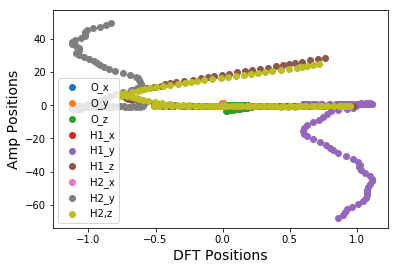

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
labels = np.array([['O_x', 'O_y', 'O_z'], ['H1_x', 'H1_y', 'H1_z'], ['H2_x', 'H2_y', 'H2,z']])
for i in range(3):
    for j in range(3):
        if j == 0:
            plt.scatter(dft_positions[:,i,j], -amp_positions[:,i,j], label=labels[i,j])
        else:
            plt.scatter(dft_positions[:,i,j], amp_positions[:,i,j], label=labels[i,j])
plt.xlabel('DFT Positions', fontsize=14)
plt.ylabel('Amp Positions', fontsize=14)
plt.legend()
plt.show()